# 6.3 Geographic Visualization

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data cleaning
#### 3.
#### 4. Plotting a choropleth

#### 1. Import data and libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [42]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline


In [3]:
path = 'C:/Users/sosia/OneDrive/Desktop/CF/Data immersion/6'

In [5]:
# Import data
df = pd.read_csv(r'C:\Users\sosia\OneDrive\Desktop\CF\Data immersion\6\6.1\df_clean.csv', index_col = False)

In [7]:
# Inserting Json 
geo_json = r'C:\Users\sosia\OneDrive\Desktop\CF\Data immersion\6\6.1\geoJSON_us_regions [MConverter.eu].json'

In [9]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\sosia\OneDrive\Desktop\CF\Data immersion\6\6.1\geoJSON_us_regions [MConverter.eu].json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Midwest'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-104.32617187499999, 49.03786794532644], [-103.974609375, 41.04621681452063], [-101.6015625, 41.04621681452063], [-102.48046875, 37.020098201368114], [-94.5703125, 37.09023980307208], [-93.603515625, 36.4566360115962], [-89.296875, 37.23032838760387], [-87.71484375, 38.272688535980976], [-85.4296875, 38.54816542304656], [-84.638671875, 39.16414104768742], [-83.232421875, 38.75408327579141], [-82.177734375, 38.685509760012], [-80.85937499999999, 39.842286020743394], [-80.595703125, 41.57436130598913], [-83.583984375, 41.96765920367816], [-82.79296874999999, 42.4234565179383], [-82.705078125, 43.389081939117496], [-83.232421875, 43.70759350405294], [-84.111328125, 43.96119063892024], [-83.49609375, 44.653024159812], [-84.55078125, 45.460130637921004], [-85.4296875, 45.1510532655634], [-86.396484375, 44.213709909702054], [-86.220703125, 43.389081939117496], [-86.220703125, 42.163403424

In [11]:
df.shape

(1337, 8)

## 2. Data Cleaning

#### Conduct consistency checks

In [15]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64

In [17]:
# Checking for duplicate data
dups = df.duplicated()

In [19]:
dups.shape # no dupes

(1337,)

<Axes: xlabel='charges', ylabel='Count'>

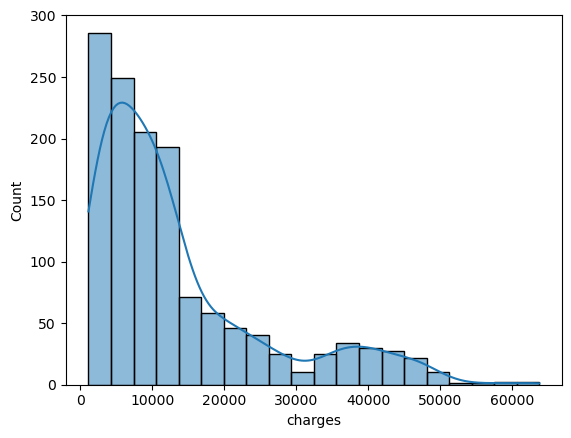

In [21]:
#### Extreme value check
sns.histplot(df['charges'], bins=20, kde = True) # shows extreme values for 'charges' no extreme values

### Data Wrangling

In [44]:
# 2. Calculate mean charges per region (Corrected)

region_charges = df.groupby('region')['charges'].mean().reset_index()

In [46]:
# Merge the region_charges data with the GeoJSON data based on region name
merged_data = pd.merge(region_charges, df[['region']].drop_duplicates(), on='region', how='left')

In [48]:
data_to_plot = merged_data
data_to_plot

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


In [50]:
data_to_plot['region'].unique()

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [52]:
# Dictionary to map old values to new values
region_mapping = {
    'northeast': 'Northeast',
    'northwest': 'Midwest',
    'southeast': 'South',
    'southwest': 'West'
}

# Replace values in the 'region' column
data_to_plot['region'] = data_to_plot['region'].replace(region_mapping)

# Display updated DataFrame
print(data_to_plot)

      region       charges
0  Northeast  13406.384516
1    Midwest  12450.840844
2      South  14735.411438
3       West  12346.937377


In [54]:
data_to_plot['region'].unique()

array(['Northeast', 'Midwest', 'South', 'West'], dtype=object)

### 3. Plotting a choropleth

In [57]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = data_to_plot[['region','charges',]]
data_to_plot.head()

,region,charges
0,Northeast,13406.384516
1,Midwest,12450.840844
2,South,14735.411438
3,West,12346.937377


In [62]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data=geo_json,
    data=data_to_plot,
    columns=['region', 'charges'],
    key_on='feature.properties.name',
    fill_color='Purples',  # Changed to 'Purples'
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name="rating"
).add_to(map)

folium.LayerControl().add_to(map)

map  # Display or save the map